In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.colors as mcolors
from pprint import pprint

# Define the path to the directories containing result.jsonl files
base_path = Path("assets")
model_dirs = [
    # Swallow-MX
    base_path / "tokyotech-llm" / "Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-elyza",

    # Karakuri
    base_path / "karakuri-ai" / "karakuri-lm-70b-chat-v0.1-gguf-q4km-hf",

    # Sakana
    base_path / "SakanaAI" / "EvoLLM-JP-A-v1-7B",
    base_path / "SakanaAI" / "EvoLLM-JP-A-v1-7B-gguf-q4km-hf",
    base_path / "SakanaAI" / "EvoLLM-JP-v1-7B",
    base_path / "SakanaAI" / "EvoLLM-JP-v1-7B-gguf-q4km-hf",
    base_path / "SakanaAI" / "EvoLLM-JP-v1-10B",

    base_path / "Xwin-LM" / "Xwin-LM-7B-V0.1",
    base_path / "Xwin-LM" / "Xwin-LM-13B-V0.1",
    base_path / "Xwin-LM" / "Xwin-LM-7B-V0.1-gguf-q4km-hf",
    base_path / "Xwin-LM" / "Xwin-LM-13B-V0.1-gguf-q4km-hf",
    #base_path / "Xwin-LM" / "Xwin-LM-70B-V0.1",

    base_path / "elyza" / "ELYZA-japanese-Llama-2-7b-instruct",
    base_path / "elyza" / "ELYZA-japanese-Llama-2-7b-instruct-gguf-q4km-hf",
    base_path / "elyza" / "ELYZA-japanese-Llama-2-13b-instruct",
    base_path / "elyza" / "ELYZA-japanese-Llama-2-13b-instruct-gguf-q4km-hf",

    base_path / "cyberagent" / "calm2-7b-chat",
    base_path / "cyberagent" / "calm2-7b-chat-gguf-q4km-hf",

    base_path / "stabilityai" / "japanese-stablelm-instruct-beta-7b",
    base_path / "stabilityai" / "japanese-stablelm-instruct-beta-7b-gguf-q4km-hf",
    #base_path / "stabilityai" / "japanese-stablelm-base-beta-70b-GGUF_TheBloke",

    base_path / "rinna" / "youri-7b-chat",
    base_path / "rinna" / "youri-7b-chat-gguf-q4km-hf",

    base_path / "tokyotech-llm" / "Swallow-7b-instruct",
    base_path / "tokyotech-llm" / "Swallow-13b-instruct",
    
    base_path / "tokyotech-llm" / "Swallow-7b-instruct-gguf-q4km-hf",
    base_path / "tokyotech-llm" / "Swallow-13b-instruct-gguf-q4km-hf",

    #base_path / "tokyotech-llm" / "Swallow-70b-instruct-hf",

]

# Dictionary to hold the statistical data for each model, including its parent
stats_data = {}

# Loop through each directory, read the result.jsonl file, and calculate the statistics
for model_dir in model_dirs:
    # Construct the file path
    file_path = model_dir / "result.jsonl"

    # Read the file
    df = pd.read_json(file_path, lines=True)
    
    # Calculate statistics
    mean_grade = df['grade'].mean()
    std_dev = df['grade'].std()
    median_grade = df['grade'].median()
    min_grade = df['grade'].min()
    max_grade = df['grade'].max()
    count = df['grade'].count()

    # Extract the model name and its parent
    model_name = model_dir.parts[-1]
    parent_name = model_dir.parent.parts[-1]
    stats_data[model_name] = [mean_grade, std_dev, median_grade, min_grade, max_grade, count, parent_name]

# Sort the stats_data dictionary by mean grade in descending order
sorted_stats_data = dict(sorted(stats_data.items(), key=lambda item: item[1][0], reverse=True))

In [139]:
from pathlib import Path
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def natural_sort_key(path):
    """
    Generate a sorting key for each path that allows for natural (human-like) sorting.
    This function will split the path into parts and convert any numbers into integers for proper sorting.
    """
    def convert(text):
        return int(text) if text.isdigit() else text.lower()

    return [convert(c) for c in re.split('([0-9]+)', path.name)]

# Sorting the list using natural sort order
#violin_model_dirs = sorted(violin_model_dirs_raw, key=lambda x: (x.parent.name, natural_sort_key(x)))
violin_model_dirs = model_dirs

# Prepare a list to store the text lengths for each model
text_lengths = []
models = []
parents = []  # List to hold the parent directory names

# Loop through each directory, read the result.jsonl file and calculate the statistics
for model_dir in violin_model_dirs:
    # Construct the file path
    file_path = model_dir / "preds.jsonl"

    # Read the file
    df = pd.read_json(file_path, lines=True)

    # Calculate text length
    df['text_length'] = df['pred'].apply(len)

    # Append the results to the lists
    text_lengths.extend(df['text_length'])
    models.extend([model_dir.name] * len(df))
    parents.extend([model_dir.parent.name] * len(df))  # Get the parent directory name

# Create a DataFrame from the text lengths, model names, and parent directory names
lengths_df = pd.DataFrame({'Parent': parents, 'Model': models, 'Text Length': text_lengths})

In [140]:
print(lengths_df.to_csv()[:300])

,Parent,Model,Text Length
0,tokyotech-llm,Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-elyza,444
1,tokyotech-llm,Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-elyza,952
2,tokyotech-llm,Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-elyza,976
3,tokyotech-llm,Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-elyza,898
4,tokyotech-llm,Sw


In [141]:
# Define the color map and hatch patterns
color_map = plt.cm.get_cmap('tab10')
hatch_patterns = ['/', '\\', '|', 'x', '+', '.', 'o', 'O', '-', '*']

# Unique parents based on your directories (considering they are the same across data loading)
unique_parents = set([dir.parent.name for dir in model_dirs])

# Generate color and hatch mappings
parent_colors = {parent: color_map(i % 10) for i, parent in enumerate(unique_parents)}
parent_hatches = {parent: hatch_patterns[i % len(hatch_patterns)] for i, parent in enumerate(unique_parents)}


/tmp/ipykernel_17154/4081846372.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


/tmp/ipykernel_17154/3522246020.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=mcolors.to_rgba(color, alpha=0.5), edgecolor=color)


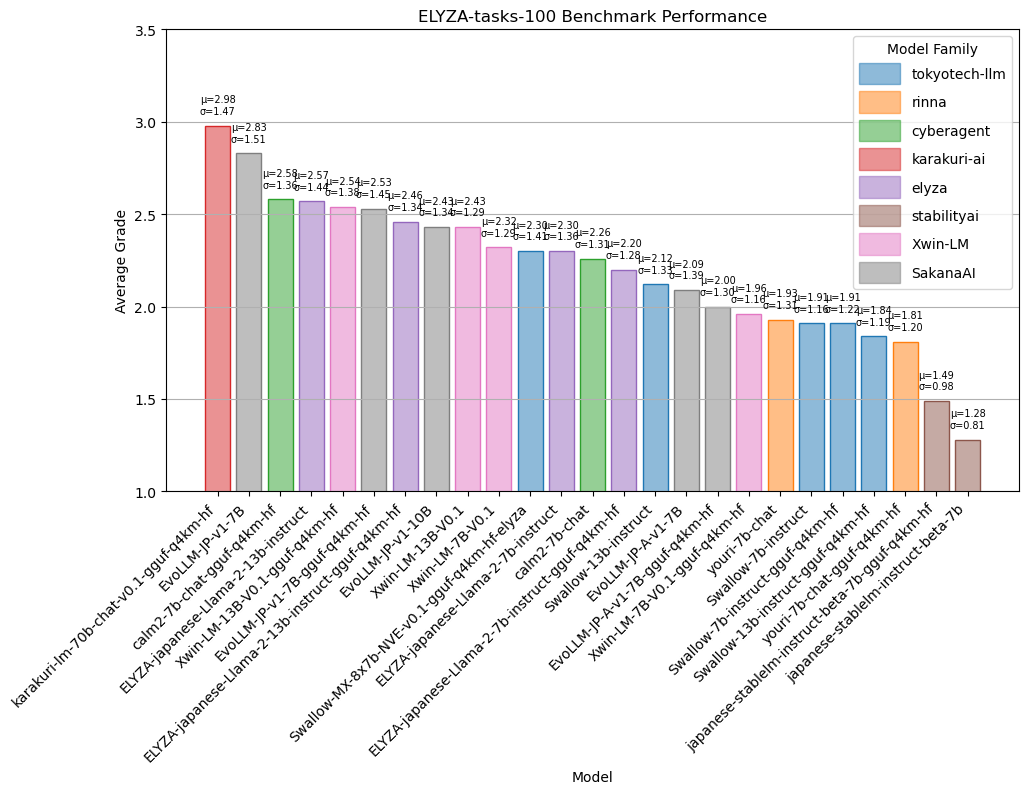

In [142]:
# Creating a bar chart with colors and hatch patterns
plt.figure(figsize=(11, 6))

for i, (model, stats) in enumerate(sorted_stats_data.items()):
    parent_name = stats[6]
    color, hatch = parent_colors[parent_name], parent_hatches[parent_name]
    fill_color = mcolors.to_rgba(color, alpha=0.5)
    # plt.bar(model, stats[0], capsize=5, color=fill_color, edgecolor=color, hatch=hatch, linewidth=1)
    plt.bar(model, stats[0], capsize=5, color=fill_color, edgecolor=color, linewidth=1)
    plt.text(i, stats[0], f"μ={stats[0]:.2f}\nσ={stats[1]:.2f}\n", ha='center', fontsize=7)

plt.xlabel('Model')
plt.ylabel('Average Grade')
plt.title('ELYZA-tasks-100 Benchmark Performance')
plt.xticks(rotation=45, ha='right')
plt.ylim(1, 3.5)
plt.grid(axis="y")

# Create a legend for the parents
# handles = [plt.Rectangle((0,0),1,1, color=mcolors.to_rgba(color, alpha=0.5), edgecolor=color, hatch=parent_hatches[parent])
handles = [plt.Rectangle((0,0),1,1, color=mcolors.to_rgba(color, alpha=0.5), edgecolor=color)
           for parent, color in parent_colors.items()]
plt.legend(handles, parent_colors.keys(), title='Model Family', handlelength=3, handleheight=2)

plt.show()


In [143]:
import pandas as pd
import numpy as np

def base_model_name(model):
    if model == "Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-elyza":
        return "Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-elyza"
    return model.replace("-gguf-q4km-hf", "")

# Initialize lists to hold the data, including parent names now
non_gguf_models = []
gguf_models = []
non_gguf_stats = []
gguf_stats = []
parents = []  # List to hold the parent names

# Create a combined set of base models (removing "-gguf-q4km-hf" from GGUF models)
base_models_set = set([base_model_name(model) if "gguf" in model else model for model in sorted_stats_data.keys()])

# Iterate through the combined set of base models
for base_model in base_models_set:
    # Handle Swallow-MX
    if base_model == "Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-elyza":
        non_gguf_models.append(np.nan)
        non_gguf_stats.append(np.nan)
        parents.append(np.nan)
        gguf_models.append(base_model)
        gguf_stats.append(sorted_stats_data[base_model])
        parents[-1] = "tokyotech-llm"
        continue

    # Handle non-GGUF models
    non_gguf_model_name = base_model
    
    if non_gguf_model_name in sorted_stats_data:
        non_gguf_models.append(non_gguf_model_name)
        non_gguf_stats.append(sorted_stats_data[non_gguf_model_name])
        parents.append(sorted_stats_data[non_gguf_model_name][6])  # Add parent name
    else:
        print(f"{non_gguf_model_name} not found in sorted_stats_data")
        non_gguf_models.append(np.nan)
        non_gguf_stats.append(np.nan)
        parents.append(np.nan)  # Placeholder for parent name, to be filled from GGUF if available

    # Handle GGUF models
    gguf_model_name = base_model + "-gguf-q4km-hf"
    if gguf_model_name in sorted_stats_data:
        gguf_models.append(gguf_model_name)
        gguf_stats.append(sorted_stats_data[gguf_model_name])
        if pd.isna(parents[-1]):  # If parent name is not set from non-GGUF, set from GGUF
            parents[-1] = sorted_stats_data[gguf_model_name][6]
    else:
        print(f"{gguf_model_name} not found in sorted_stats_data")
        gguf_models.append(np.nan)
        gguf_stats.append(np.nan)

# Create the DataFrame
models_df = pd.DataFrame({
    'non-GGUF model': non_gguf_models,
    'GGUF model': gguf_models,
    'non-GGUF stats': non_gguf_stats,
    'GGUF stats': gguf_stats,
    'Parent': parents  # Include the parent names
})

# Extract sorting keys from the DataFrame
non_gguf_present = -models_df['non-GGUF stats'].apply(lambda x: isinstance(x, list)).astype(int)  # -1 for present, 0 for NaN
non_gguf_sort_key = models_df['non-GGUF stats'].apply(lambda x: x[0] if isinstance(x, list) else np.inf)
gguf_sort_key = models_df['GGUF stats'].apply(lambda x: x[0] if isinstance(x, list) else np.inf)

# Use lexsort to get the sorted indices; primary sort is non_gguf_sort_key, secondary is non_gguf_present, tertiary is gguf_sort_key
sorted_indices = np.lexsort((gguf_sort_key, non_gguf_sort_key, non_gguf_present))[::-1]

# Apply the sorted indices to the DataFrame
models_df = models_df.iloc[sorted_indices]

# Reset index after sorting
models_df.reset_index(drop=True, inplace=True)

# Filter out rows where both 'non-GGUF model' and 'GGUF model' are NaN
models_df.dropna(subset=['non-GGUF model', 'GGUF model'], how='all', inplace=True)
models_df.reset_index(inplace=True)

# Now models_df includes a 'Parent' column that is set based on available stats
print(models_df)


karakuri-lm-70b-chat-v0.1 not found in sorted_stats_data
EvoLLM-JP-v1-10B-gguf-q4km-hf not found in sorted_stats_data
    index                       non-GGUF model  \
0       0                                  NaN   
1       1                                  NaN   
2       2                      EvoLLM-JP-v1-7B   
3       3  ELYZA-japanese-Llama-2-13b-instruct   
4       4                     EvoLLM-JP-v1-10B   
5       5                     Xwin-LM-13B-V0.1   
6       6                      Xwin-LM-7B-V0.1   
7       7   ELYZA-japanese-Llama-2-7b-instruct   
8       8                        calm2-7b-chat   
9       9                 Swallow-13b-instruct   
10     10                    EvoLLM-JP-A-v1-7B   
11     11                        youri-7b-chat   
12     12                  Swallow-7b-instruct   
13     13   japanese-stablelm-instruct-beta-7b   

                                          GGUF model  \
0             karakuri-lm-70b-chat-v0.1-gguf-q4km-hf   
1        Swallow-MX

In [144]:
parent_colors

{'tokyotech-llm': (0.12156862745098039,
  0.4666666666666667,
  0.7058823529411765,
  1.0),
 'rinna': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 'cyberagent': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313,
  1.0),
 'karakuri-ai': (0.8392156862745098,
  0.15294117647058825,
  0.1568627450980392,
  1.0),
 'elyza': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 'stabilityai': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354,
  1.0),
 'Xwin-LM': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 'SakanaAI': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)}

In [145]:
parent_colors_appendix = {}

for parent in parent_colors:
    if parent == "karakuri-ai":
        parent_colors_appendix[parent] = (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
    elif parent == "SakanaAI":
        parent_colors_appendix[parent] = (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
    else:
        parent_colors_appendix[parent] = (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)

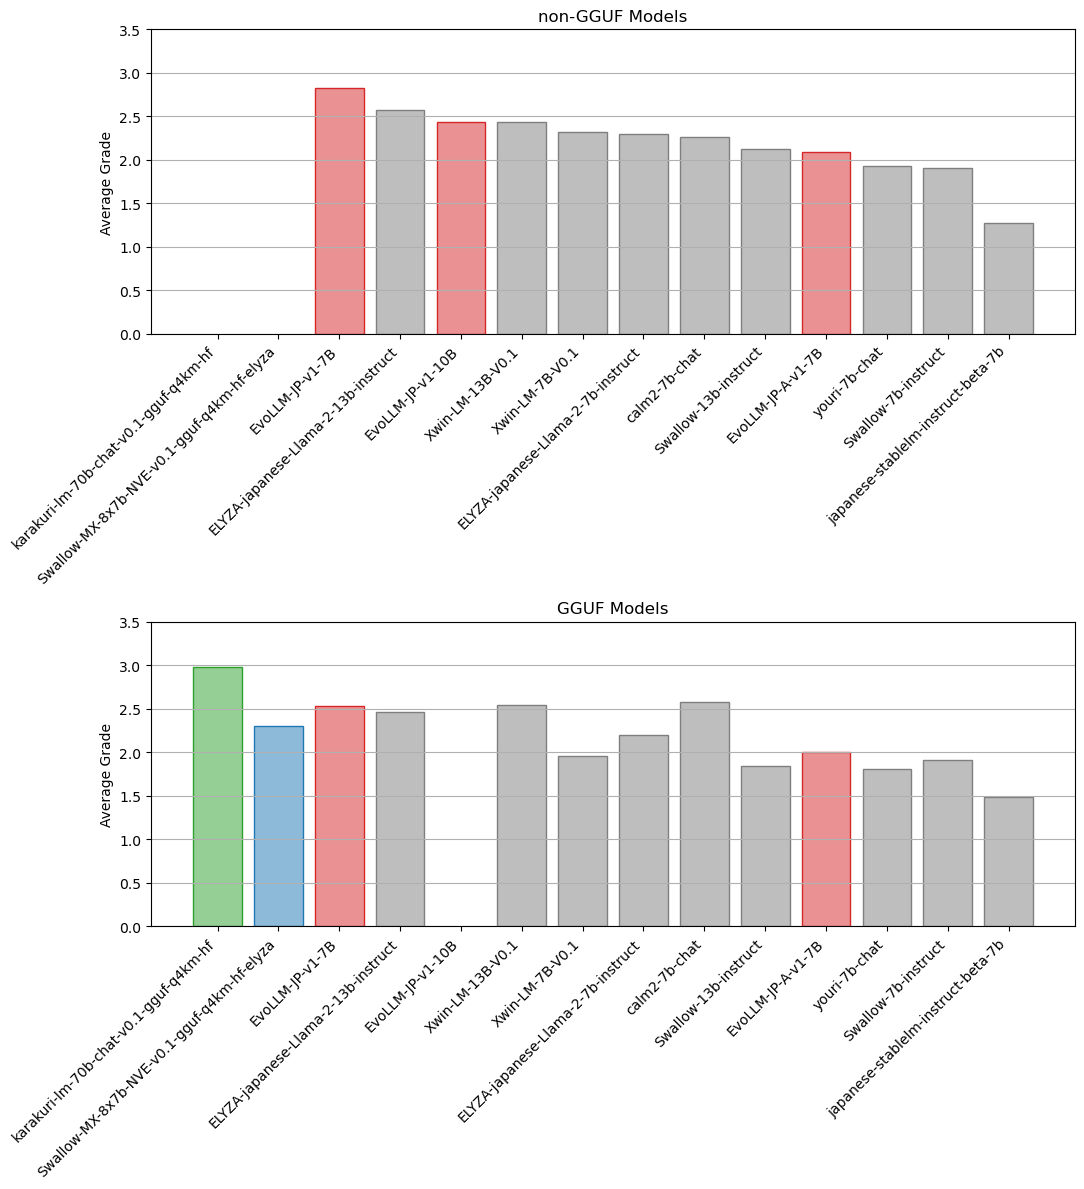

In [146]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_aligned_bars(df, ax, model_type):
    # Set up the bar positions
    bar_positions = np.arange(len(df))  # the label locations
    
    # Plot non-GGUF or GGUF models based on the model_type parameter
    if model_type == 'non-GGUF':
        stats_col = 'non-GGUF stats'
        model_col = 'non-GGUF model'
    else:
        stats_col = 'GGUF stats'
        model_col = 'GGUF model'
        
    # Draw the bars
    for i, row in df.iterrows():
        if pd.notna(row[model_col]):
            color = parent_colors_appendix[row['Parent']]
            if row["GGUF model"] == "Swallow-MX-8x7b-NVE-v0.1-gguf-q4km-hf-elyza":
                color = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
            fill_color = mcolors.to_rgba(color, alpha=0.5)
            ax.bar(i, row[stats_col][0], color=fill_color, edgecolor=color, linewidth=1)
        else:
            # Display the dummy bar to align the bars vertically
            ax.bar(i, 0, color="black", linewidth=1)

    # Set the x-axis labels and ticks
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(df['non-GGUF model'].combine_first(df['GGUF model']), rotation=45, ha='right')
    
    # Set common attributes
    ax.set_ylim(0, 3.5)
    ax.set_title(f'{model_type} Models')
    ax.set_ylabel('Average Grade')
    ax.grid(axis="y")

# Create a 2-row subplot structure
fig, axs = plt.subplots(2, 1, figsize=(11, 12), sharex=False)

# Plot non-GGUF models on the first subplot
plot_aligned_bars(models_df, axs[0], 'non-GGUF')

# Plot GGUF models on the second subplot
plot_aligned_bars(models_df, axs[1], 'GGUF')

## Create a legend for the parents
#handles = [plt.Rectangle((0,0),1,1, color=mcolors.to_rgba(color, alpha=0.5))
#           for parent, color in parent_colors.items()]
#fig.legend(handles, parent_colors.keys(), title='Model Family', loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data into two DataFrames based on the presence of "gguf" in the model names
gguf_df = lengths_df[lengths_df['Model'].str.contains("gguf")]
no_gguf_df = lengths_df[~lengths_df['Model'].str.contains("gguf")]

# Find the models that are missing from the no_gguf_df DataFrame
num_missing_models = 2

# Create a DataFrame with NaN values for the missing models
missing_df = pd.DataFrame({
    'Model': [f"{i}" for i in range(num_missing_models)],
    'Text Length': [np.nan] * num_missing_models,
    'Parent': ['SakanaAI'] * num_missing_models,
})

# Add the missing DataFrame to the no_gguf_df DataFrame
no_gguf_df = pd.concat([missing_df, no_gguf_df], ignore_index=True)

insert_row = pd.DataFrame({
    'Model': [""],
    'Text Length': [0],
    'Parent': ["SakanaAI"],
})

gguf_df = pd.concat([
    gguf_df.loc[:599],
    insert_row,
    gguf_df.loc[600:],
])

gguf_df.iloc[395:405]

,Parent,Model,Text Length
595,SakanaAI,EvoLLM-JP-v1-7B-gguf-q4km-hf,515
596,SakanaAI,EvoLLM-JP-v1-7B-gguf-q4km-hf,212
597,SakanaAI,EvoLLM-JP-v1-7B-gguf-q4km-hf,91
598,SakanaAI,EvoLLM-JP-v1-7B-gguf-q4km-hf,653
599,SakanaAI,EvoLLM-JP-v1-7B-gguf-q4km-hf,347
0,SakanaAI,,0
900,Xwin-LM,Xwin-LM-7B-V0.1-gguf-q4km-hf,438
901,Xwin-LM,Xwin-LM-7B-V0.1-gguf-q4km-hf,881
902,Xwin-LM,Xwin-LM-7B-V0.1-gguf-q4km-hf,685
903,Xwin-LM,Xwin-LM-7B-V0.1-gguf-q4km-hf,478


/tmp/ipykernel_17154/3028063623.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 14.0% of the 

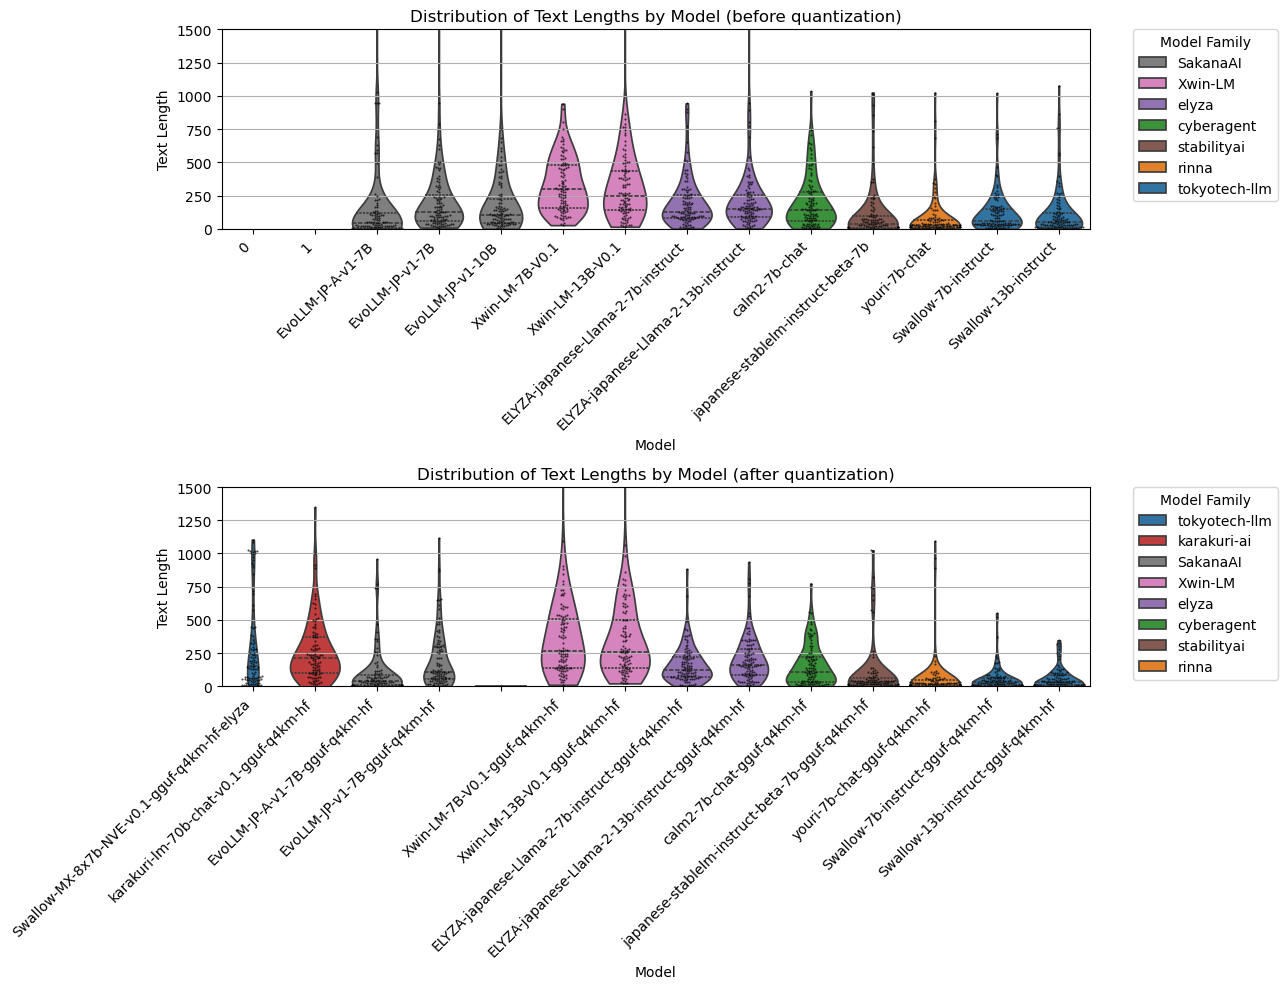

In [153]:
# Create a 2-row subplot structure
fig, axs = plt.subplots(2, 1, figsize=(13, 10))

# Plot for models without "gguf" in the name, including placeholders
sns.violinplot(x='Model', y='Text Length', hue='Parent', data=no_gguf_df, ax=axs[0],
               palette=parent_colors, inner='quartile', cut=0)
sns.swarmplot(x='Model', y='Text Length', data=no_gguf_df, ax=axs[0], color='k', alpha=0.7, s=1.5)

axs[0].set_title('Distribution of Text Lengths by Model (before quantization)')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
axs[0].set_ylim(0, 1500)
axs[0].grid(axis="y")
axs[0].legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Plot for models with "gguf" in the name
sns.violinplot(x='Model', y='Text Length', hue='Parent', data=gguf_df, ax=axs[1],
               palette=parent_colors, inner='quartile', cut=0)
sns.swarmplot(x='Model', y='Text Length', data=gguf_df, ax=axs[1], color='k', alpha=0.7, s=1.5)
axs[1].set_title('Distribution of Text Lengths by Model (after quantization)')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
axs[1].set_ylim(0, 1500)
axs[1].grid(axis="y")
axs[1].legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Adjust layout
plt.tight_layout()
plt.show()
